# Librerías

In [78]:
import numpy as np
from matplotlib.pylab import *
from scipy.signal import kaiserord, firwin, freqz, lfilter
#from scipy import *
import scipy.signal as signal
import sounddevice as sd
#from ztrans import *
import matplotlib.pyplot as plt
%matplotlib inline

# Diseño por enventanado

## Diseño de Filtro FIR Pasabajos (fc = 1500)

In [79]:
# Parámetros de Diseño

fc_lp = 1500 # Frecuencia de corte
fs = 20000 # Frecuencia de muestreo
N = 512 #Puntos de la FFT
rp_lp = 0.5 # % de ripple en la banda de paso
BW_lp = 250 # Ancho de banda en la banda de tansicion

In [80]:
# Cálculos
rp_db = 20*log10(rp_lp/100) # ripple en dB 
print(rp_db) 

-46.020599913279625


In [81]:
# Cálculo del orden del filtro 
M = int(4*fs/BW_lp) # Orden del filtro

In [82]:
# Usamos la ventana de Hamming porque se necesita una atenuación de más de 40 dB
wc_lp = 2*np.pi*fc_lp/fs
bwn_lp = 2*np.pi*BW_lp/fs # ancho de banda  normalizado en radianes
M_lp = M # orden estimado del filtro
n_lp = np.arange(-int(M_lp/2),int(M_lp/2)) # vector de muestras
print('Orden del filtro: ', M_lp)

Orden del filtro:  320


In [83]:
#Filtro sin enventanado
h1_lp = wc_lp/np.pi * np.sinc(wc_lp*(n_lp)/np.pi)
w1_lp,Hh1_lp = signal.freqz(h1_lp,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

In [84]:
# Filtro con ventana de Hamming

win_lp = signal.windows.hamming(len(n_lp)) # funcion ventana para eliminar el fenomeno de Gibbs
h2_lp = h1_lp*win_lp # Multiplico la respuesta ideal por la ventana

w2_lp,Hh2_lp = signal.freqz(h2_lp,1,whole=True, worN=N) # Respuesta en frecuencia del filtro con ventana

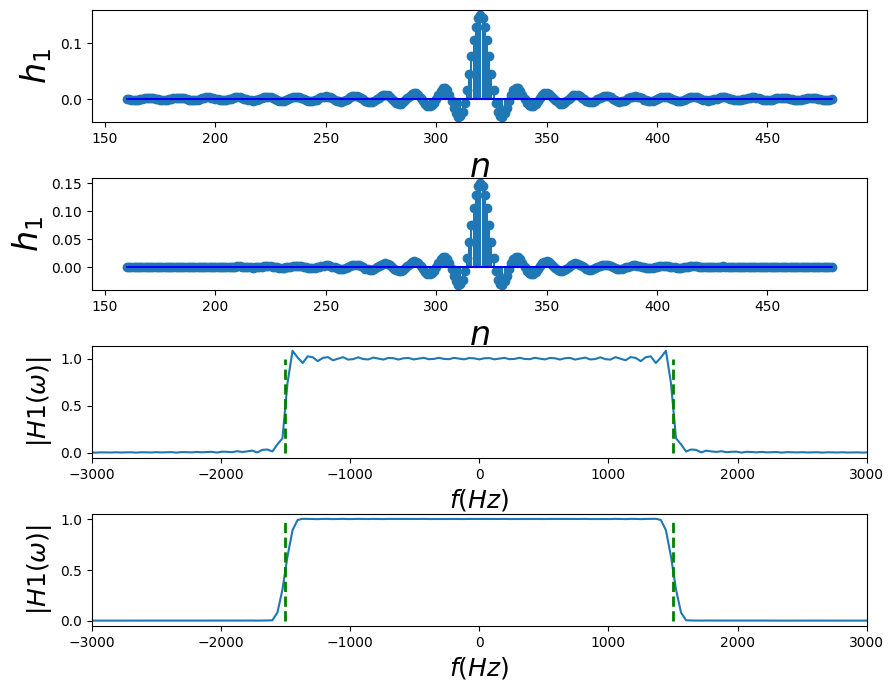

In [85]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.stem(n_lp + M_lp, h1_lp, basefmt='b-')
ax1.set_xlabel("$n$",fontsize=24)
ax1.set_ylabel("$h_1$",fontsize=24)

ax2.stem(n_lp+M_lp,h2_lp,basefmt='b-')
ax2.set_xlabel("$n$",fontsize=24)
ax2.set_ylabel("$h_1$",fontsize=24)

ax3.plot((w1_lp-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh1_lp)))
ax3.axis(xmax=fs/2,xmin=-fs/2)
ax3.vlines([fc_lp],0,1,color='g',lw=2.,linestyle='--')
ax3.vlines([-fc_lp],0,1,color='g',lw=2.,linestyle='--')
ax3.set_xlim(-2*fc_lp,2*fc_lp)
ax3.set_xlabel(r"$f (Hz)$",fontsize=18)
ax3.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

ax4.plot((w2_lp-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2_lp)))
ax4.axis(xmax=fs/2,xmin=-fs/2)
ax4.vlines([fc_lp],0,1,color='g',lw=2.,linestyle='--')
ax4.vlines([-fc_lp],0,1,color='g',lw=2.,linestyle='--')
ax4.set_xlim(-2*fc_lp,2*fc_lp)
ax4.set_xlabel(r"$f (Hz)$",fontsize=18)
ax4.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

plt.subplots_adjust(hspace = 0.5)

plt.show()

## FIR Pasabandas (fo = 5 KHz)

In [86]:
# Parámetros de Diseño

fc1_bp = 3500.0 # Frecuencia de corte inferior
fc2_bp = 6500.0 # Frecuencia de corte superior

BW_bp = 200 # Ancho de banda en la banda de tansicion

wc1_bp = 2*np.pi*fc1_bp/fs
wc2_bp = 2*np.pi*fc2_bp/fs # frecuencias de corte normalizada en radianes

bwn_bp = 2*np.pi*BW_bp/fs # ancho de banda  normalizado en radianes

M_bp = M # orden estimado del filtro
print('Orden del filtro: ', M_bp)

n_bp = np.arange(-int(M_bp/2),int(M_bp/2)) # vector de muestras del filtro

Orden del filtro:  320


In [87]:
# Filtro con Ventana 

h_bp_b = wc2_bp/np.pi * np.sinc(wc2_bp*(n_bp)/np.pi)
h_bp_a = -wc1_bp/np.pi * np.sinc(wc1_bp*(n_bp)/np.pi)

h_bp = h_bp_b + h_bp_a
h_bp[n_bp==0] = (wc2_bp - wc1_bp)/np.pi  #cuando es pasa banda

win_bp = signal.windows.hamming(len(n_bp)) # Ventana de Hamming

h_bp_win = h_bp*win_bp # Multiplico la respuesta ideal por la ventana

w_bp,Hh_bp = signal.freqz(h_bp_win,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado



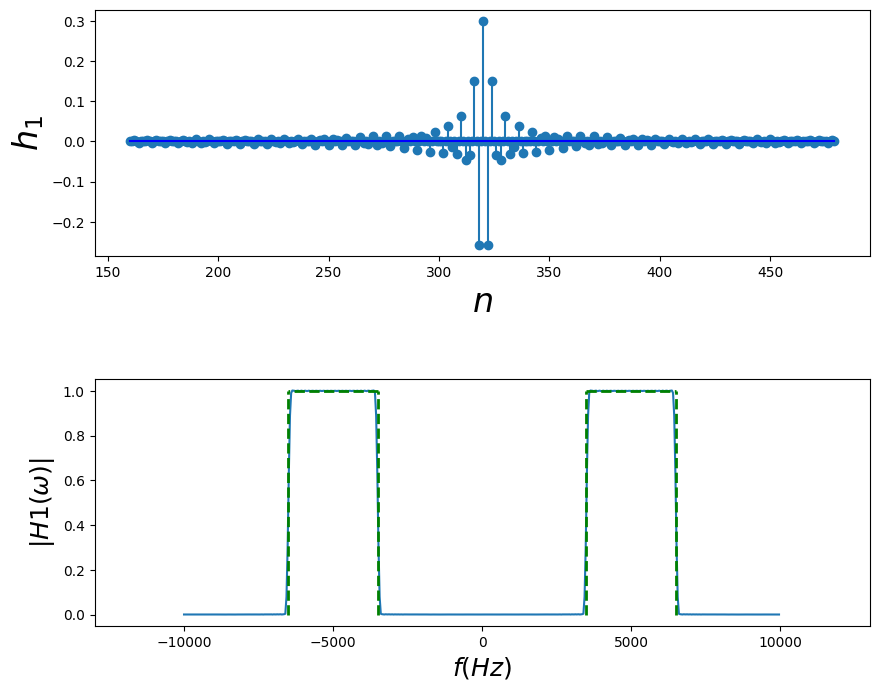

In [88]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.stem(n_bp + M_bp, h_bp, basefmt='b-')
ax1.set_xlabel("$n$",fontsize=24)
ax1.set_ylabel("$h_1$",fontsize=24)

ax2.plot((w_bp-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh_bp)))
ax2.axis(xmax=fs/2,xmin=-fs/2)
ax2.vlines([fc1_bp,fc2_bp],0,1,color='g',lw=2.,linestyle='--')
ax2.hlines(1,fc1_bp,fc2_bp,color='g',lw=2.,linestyle='--')
ax2.vlines([-fc1_bp,-fc2_bp],0,1,color='g',lw=2.,linestyle='--')
ax2.hlines(1,-fc1_bp,-fc2_bp,color='g',lw=2.,linestyle='--')
ax2.set_xlim(-2*fc2_bp,2*fc2_bp)
ax2.set_xlabel(r"$f (Hz)$",fontsize=18)
ax2.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

plt.subplots_adjust(hspace = 0.5)

plt.show()

## Filtro FIR Pasaaltos (fc = 7500)

In [89]:
# Parámetros de Diseño

fc_hp = 7500.0 # Frecuencia de corte

BW_hp = 200 # Ancho de banda en la banda de tansicion

wc_hp = 2*np.pi*fc_hp/fs

bwn_hp = 2*np.pi*BW_hp/fs # ancho de banda  normalizado en radianes

M_hp = M # orden estimado del filtro
print('Orden del filtro: ', M_hp)

n_hp = np.arange(-int(M_hp/2),int(M_hp/2)) # vector de muestras del filtro

Orden del filtro:  320


In [90]:
# Filtro con ventana de Hamming
h_hp = -wc_hp/np.pi * np.sinc(wc_hp*(n_hp)/np.pi)

h_hp[n_hp==0]=1-(wc_hp)/np.pi # cuando es pasa--altas

win_hp = signal.windows.hamming(len(n_hp)) # funcion ventana para eliminar el fenomeno de Gibbs
h_hp = h_hp*win_hp # Multiplico la respuesta ideal por la ventana

w_hp,Hh_hp = signal.freqz(h_hp,1,whole=True, worN=N) # Respuesta en frecuencia del filtro con ventana|

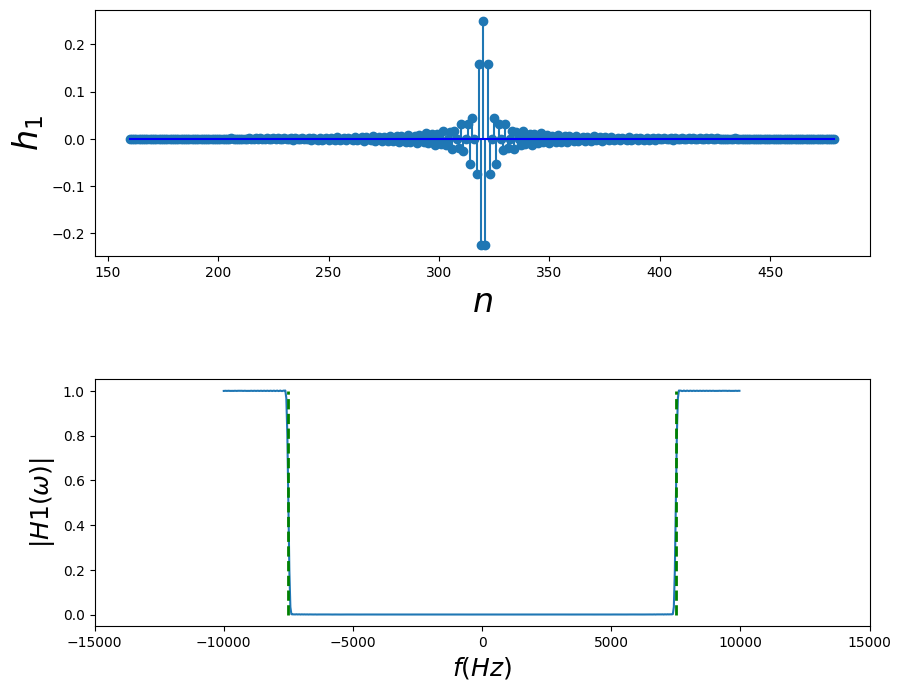

In [91]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.stem(n_hp + M_hp, h_hp, basefmt='b-')
ax1.set_xlabel("$n$",fontsize=24)
ax1.set_ylabel("$h_1$",fontsize=24)

ax2.plot((w_hp-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh_hp)))
ax2.axis(xmax=fs/2,xmin=-fs/2)
ax2.vlines([fc_hp],0,1,color='g',lw=2.,linestyle='--')
ax2.vlines([-fc_hp],0,1,color='g',lw=2.,linestyle='--')
ax2.set_xlim(-2*fc_hp,2*fc_hp)
ax2.set_xlabel(r"$f (Hz)$",fontsize=18)
ax2.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

plt.subplots_adjust(hspace = 0.5)

plt.show()

# Diseño de filtros FIR por muestreo en frecuencia

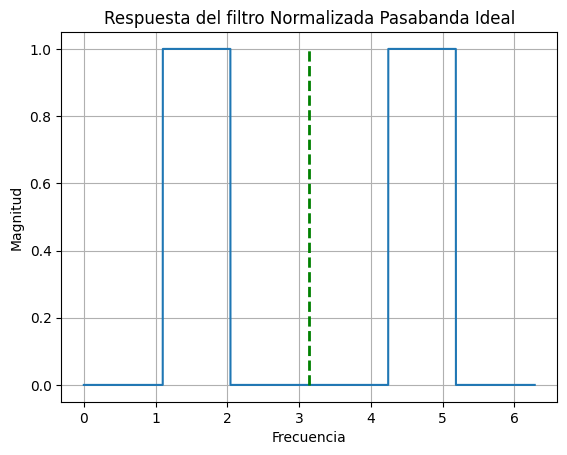

In [92]:
def ideal_bandpass_response(f1, f2, fs, N):

    w1n = 2 * np.pi * f1/ fs
    w2n = 2 * np.pi * f2/ fs
    freq = np.linspace(0, 2*np.pi, N)
    response = np.zeros_like(freq)
    response[(freq >= w1n) & (freq <= w2n)] = 1
    response[(freq >= 2*np.pi - w2n) & (freq <= 2*np.pi - w1n)] = 1
    return freq, response

f1 = 3500  # Lower cutoff frequency
f2 = 6500  # Upper cutoff frequency
fs = 20000  # Sampling frequency
N = 10000000  # Number of samples of the original signal

freq, response = ideal_bandpass_response(f1, f2, fs, N)

plt.plot(freq, response)
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.vlines([np.pi],0,1,color='g',lw=2.,linestyle='--')
plt.title('Respuesta del filtro Normalizada Pasabanda Ideal')
plt.grid(True)
plt.show()

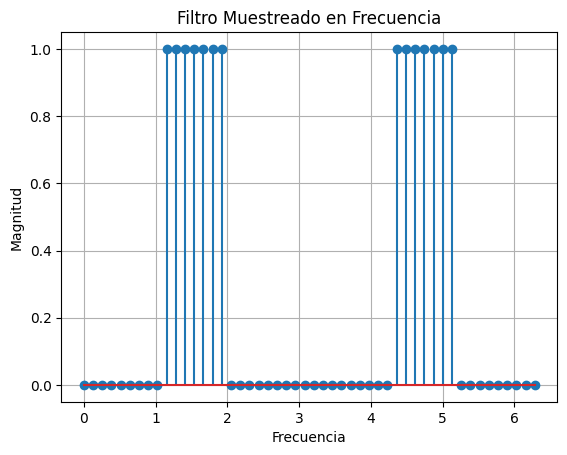

In [93]:
# Sampling the response 

Nm = 50  # Number of points
uniform_points = np.linspace(0, len(response)-1, Nm, dtype=int)
S_signal = response[uniform_points]

freq_s = np.linspace(0, 2*np.pi, Nm)
plt.stem(freq_s,S_signal)
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.title('Filtro Muestreado en Frecuencia')
plt.grid(True)

In [94]:
# IDFT

h_f = []
a = (Nm-1)/2

for n in range(int(Nm/2)):
    sum = 0
    for k in range(1,int(Nm/2)):
        sum += 2*abs(S_signal[k])*np.cos(2*np.pi*k*(n-a)/Nm)
    h_f.append((sum + S_signal[0])/Nm)

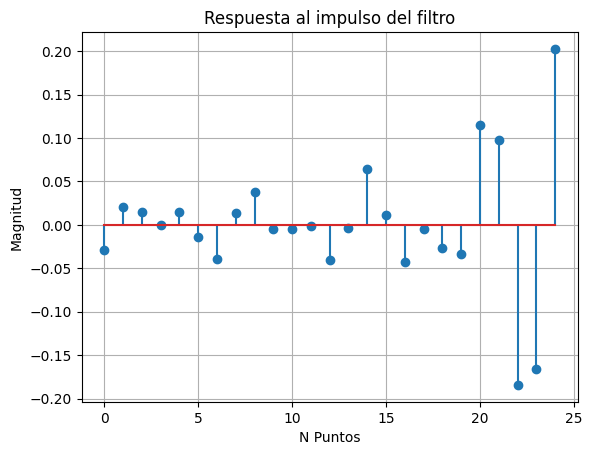

In [95]:
plt.stem(h_f)
plt.xlabel('N Puntos')
plt.ylabel('Magnitud')
plt.title('Respuesta al impulso del filtro')
plt.grid(True)
plt.show()

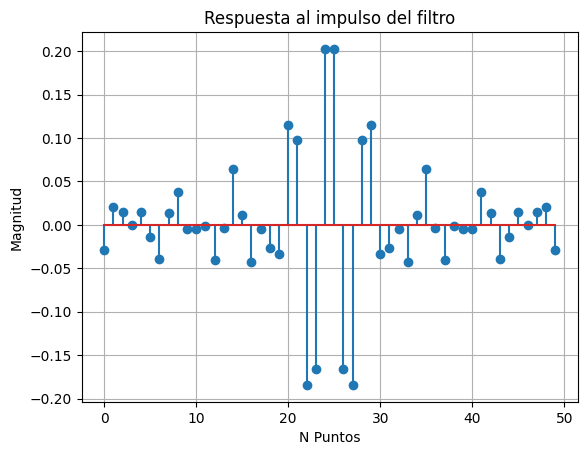

In [96]:
#Reflejar el filtro para el resto de coeficientes

ref_h_f = h_f[::-1]
hi = np.concatenate((h_f, ref_h_f))
plt.stem(hi)
plt.xlabel('N Puntos')
plt.ylabel('Magnitud')
plt.title('Respuesta al impulso del filtro')
plt.grid(True)
plt.show()

In [97]:
# Respuesta en frecuencia del filtro
wf2,Hh2 = signal.freqz(hi,1,whole=True, worN = 512) 

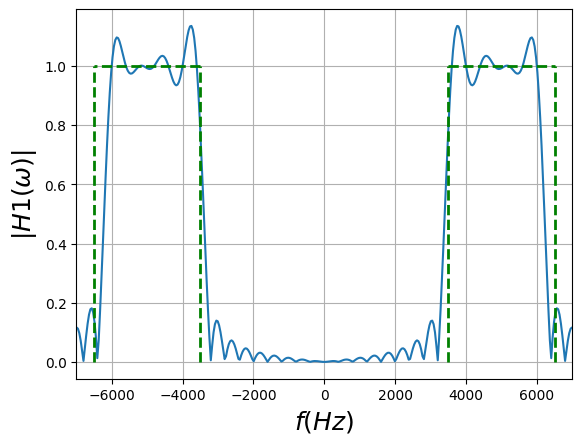

In [98]:
# Grafica de la respuesta en frecuencia del filtro

plt.plot((wf2-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2)))
plt.axis(xmax=fs/2,xmin=-fs/2)
plt.vlines([f1,f2],0,1,color='g',lw=2.,linestyle='--')
plt.hlines(1,f1,f2,color='g',lw=2.,linestyle='--')
plt.vlines([-f1,-f2],0,1,color='g',lw=2.,linestyle='--')
plt.hlines(1,-f1,-f2,color='g',lw=2.,linestyle='--')
plt.xlim(-2*f1,2*f1)
plt.xlabel(r"$f (Hz)$",fontsize=18)
plt.ylabel(r"$|H1(\omega)| $",fontsize=18)
plt.grid(True)

# Filtro Pasabanda por Método FIR - Analógico

# Filtrado de una señal de audio

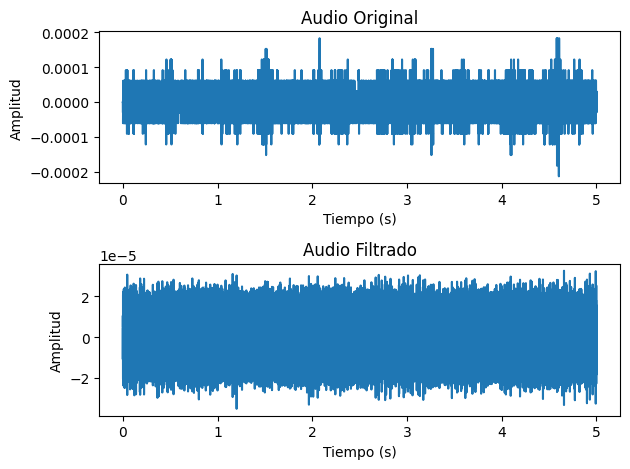

In [99]:
fs_a = 44100  # Sample rate (Hz)
duration = 5  # Duration of audio capture (seconds)

# Capture audio in real-time
audio = sd.rec(int(fs_a * duration), samplerate = fs_a, channels=1)
sd.wait()

# Apply the designed filter to the captured audio
filtered_audio = signal.convolve(audio[:, 0], hi, mode='same')

# Plot the original audio
plt.subplot(4, 1, 1)
plt.plot(np.arange(len(audio)) / fs_a, audio[:, 0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Audio Original')

# Plot the filtered audio FIR - WINDOW
plt.subplot(4, 1, 2)
plt.plot(np.arange(len(filtered_audio)) / fs_a, filtered_audio)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Audio Filtrado')

# Display the plots
plt.tight_layout()
plt.show()
